In [5]:
import pandas as pd
import numpy as np
from datetime import datetime
import re
import pytz
from IPython.display import display
import matplotlib.pyplot as plt
import sys
import os
import seaborn as sns

=== Headline Length Statistics ===


,headline_char_length,headline_word_length
count,11249.000000,11249.000000
mean,88.621566,13.456663
std,46.304743,6.994836
min,18.000000,3.000000
25%,61.000000,9.000000
50%,80.000000,12.000000
75%,98.000000,15.000000
max,512.000000,77.000000


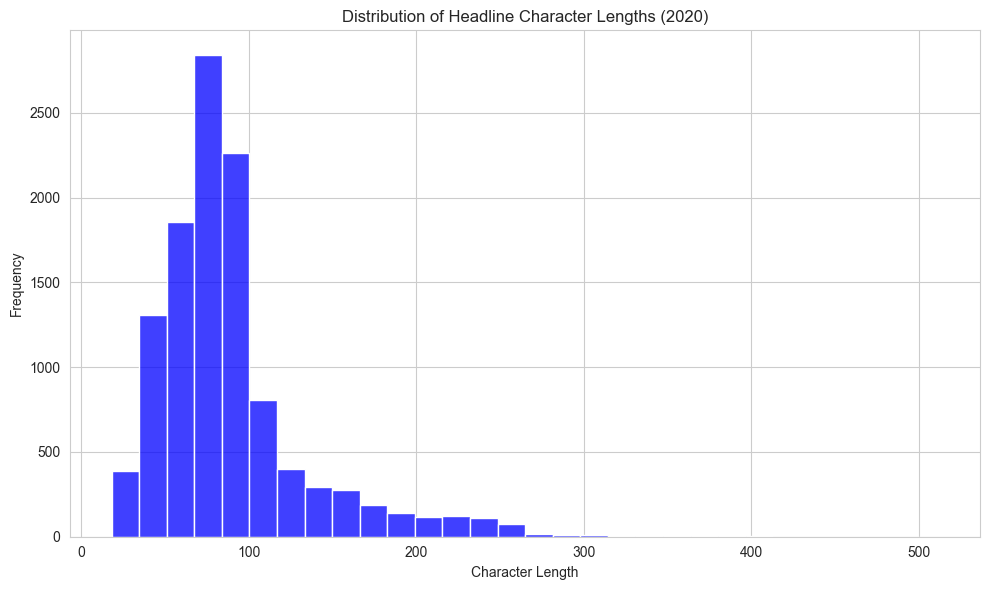


=== Articles per Publisher ===


publisher
Benzinga Newsdesk          5697
Vick Meyer                 1453
Lisa Levin                  810
vishwanath@benzinga.com     704
Benzinga_Newsdesk           671
Benzinga Insights           595
Charles Gross               234
Benzinga Newsdesk           190
Luke J Jacobi               110
Shanthi Rexaline            108
Name: count, dtype: int64

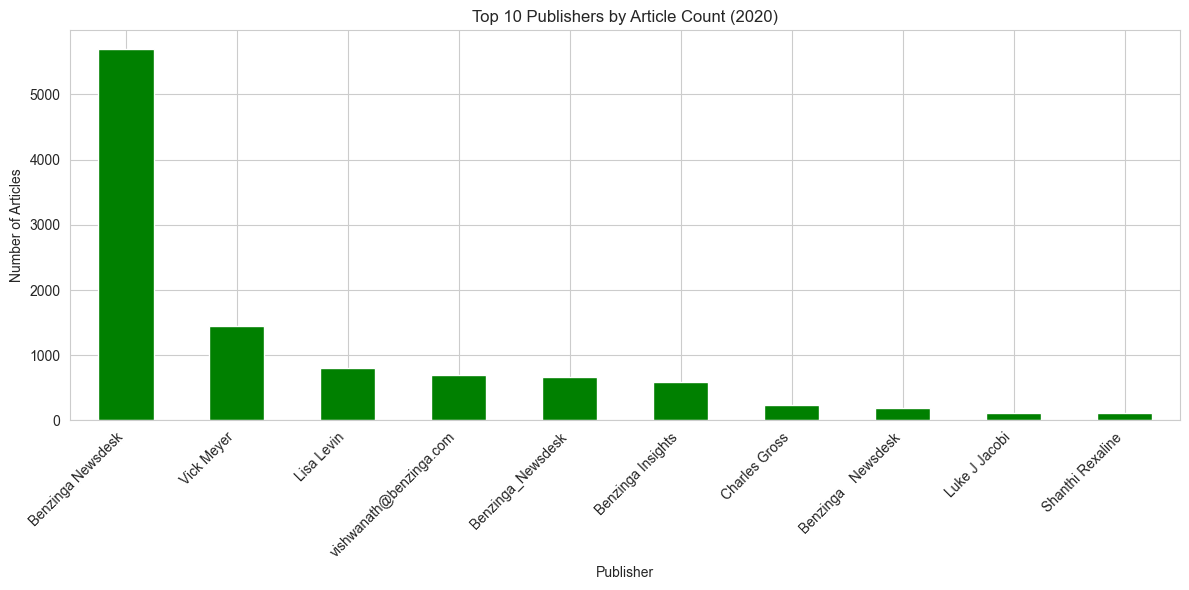


=== Daily Article Counts (Sample) ===


date_only
2020-01-01     1
2020-01-02     7
2020-01-03    15
2020-01-05     1
2020-01-06    19
2020-01-07    26
2020-01-08    23
2020-01-09    14
2020-01-10     5
2020-01-11     1
Name: count, dtype: int64

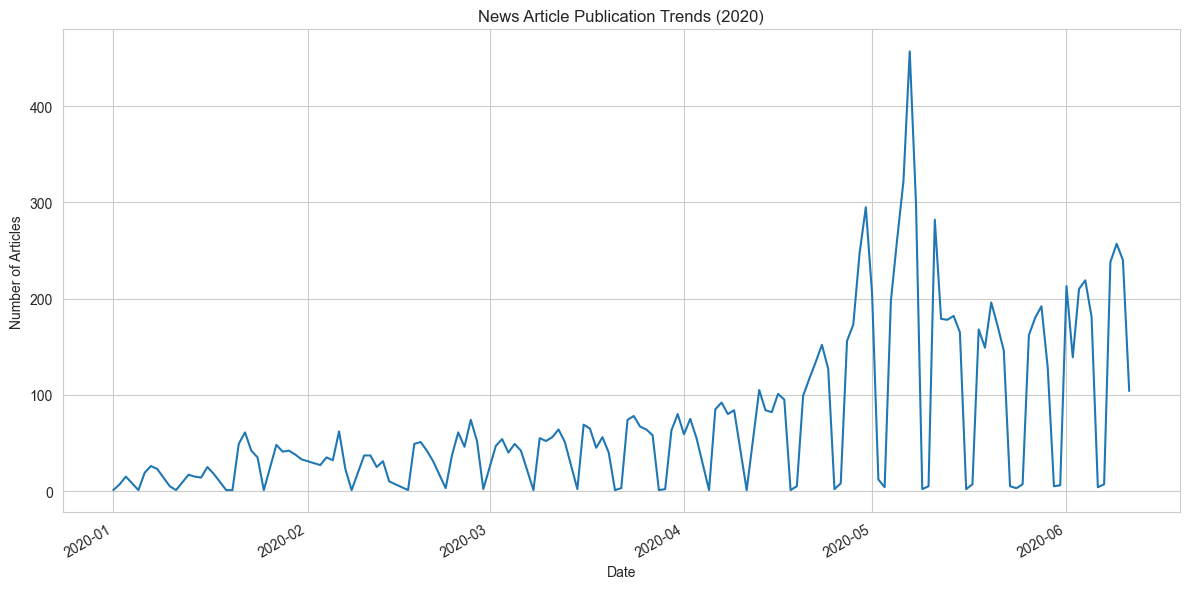


=== Peak Publication Days ===


date_only
2020-04-29    247
2020-04-30    295
2020-05-05    262
2020-05-06    322
2020-05-07    457
2020-05-08    299
2020-05-11    282
2020-06-09    257
Name: count, dtype: int64

In [6]:


# ---
# title: Descriptive Statistics for 2020 Financial News Dataset
# description: Notebook to compute headline length stats, articles per publisher, and publication date trends
# ---

# ### 1. Adjust Python Path
# Add project root to Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from src.data_utils import (
    load_and_validate_dataset,
    calculate_headline_length,
    count_articles_per_publisher,
    analyze_publication_dates
)

# Set plot style
sns.set_style("whitegrid")

# ### 2. Load Cleaned News Dataset
news_columns = ['headline', 'url', 'publisher', 'date', 'stock', 'date_only']
news_df = load_and_validate_dataset('../data/fnspid_news_cleaned_2020.csv', expected_columns=news_columns)

if news_df is None:
    raise SystemExit("Failed to load news dataset. Check file path.")

# Convert date_only to datetime
news_df['date_only'] = pd.to_datetime(news_df['date_only'])

# ### 3. Headline Length Statistics
# Calculate headline lengths
news_df = calculate_headline_length(news_df, text_column='headline')

# Compute basic statistics
headline_stats = news_df[['headline_char_length', 'headline_word_length']].describe()
print("=== Headline Length Statistics ===")
display(headline_stats)

# Visualize headline character length distribution
plt.figure(figsize=(10, 6))
sns.histplot(news_df['headline_char_length'], bins=30, color='blue')
plt.title('Distribution of Headline Character Lengths (2020)')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('task-1-plots/headline_length_distribution_2020.png')
plt.show()

# ### 4. Articles per Publisher
# Count articles per publisher
publisher_counts = count_articles_per_publisher(news_df, publisher_column='publisher')  # Changed from 'publisher_domain' to 'publisher'
print("\n=== Articles per Publisher ===")
display(publisher_counts.head(10))  # Top 10 publishers

# Visualize top 10 publishers
plt.figure(figsize=(12, 6))
publisher_counts.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Publishers by Article Count (2020)')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('task-1-plots/publisher_article_counts_2020.png')
plt.show()

# ### 5. Publication Date Trends
# Analyze publication dates
date_counts = analyze_publication_dates(news_df, date_column='date_only')
print("\n=== Daily Article Counts (Sample) ===")
display(date_counts.head(10))

# Visualize publication trends
plt.figure(figsize=(12, 6))
date_counts.plot()
plt.title('News Article Publication Trends (2020)')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.tight_layout()
plt.savefig('task-1-plots/publication_date_trends_2020.png')
plt.show()

# Identify peak days
peak_days = date_counts[date_counts >= date_counts.quantile(0.95)]  # Top 5% days
print("\n=== Peak Publication Days ===")
display(peak_days)